<a href="https://colab.research.google.com/github/fMurugi/complete-neural-network-course/blob/main/neuralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [112]:
x,y = sklearn.datasets.make_moons(n_samples=200,noise=0.15)

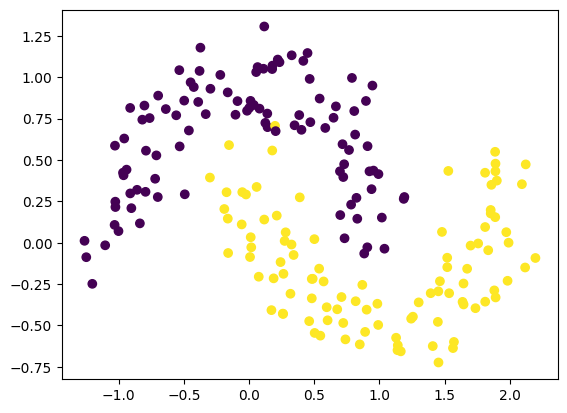

In [113]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [114]:
x.shape

(200, 2)

In [115]:
input_neurons = 2
output_neurons = 2
samples = x.shape[0]
learning_rate =0.0001
lambda_reg = 0.01


Forward propagation

In [116]:
# model_dic = {'W1':w1,'b1':b1,'W2':w2,'b2':b2}


In [117]:
def retrieve(model_dic):
  w1 = model_dic['w1']
  b1 = model_dic['b1']
  w2 = model_dic['w2']
  b2 = model_dic['b2']
  return w1,b1,w2,b2

In [118]:
def forward(x,model_dic):
  w1,b1,w2,b2 = retrieve(model_dic)
  #multiply the weights and inputs plus bias
  z1 = x.dot(w1)+b1
  #activation
  a1=np.tanh(z1)
  #now the activated output of the layer1 is the input of layer 2
  z2 = a1.dot(w2)+b2
  a2 = np.tanh(z2)
  # softmax
  exp_scores = np.exp(a2)
  #normalize the exponential scores
  softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return z1,a1,softmax


In [119]:
y[0]

np.int64(1)

In [120]:
#Loss CE calculation
# softmax here is the prediciton and y is the actual/ ground trusths
def loss(softmax,y,model_dic):
    # get weights as we are going to do l2 regularization
    w1,b1,w2,b2 = retrieve(model_dic)
    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i]=predicted

    log_prob = -np.log(m)
    softmax_loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    loss = softmax_loss + reg_loss
    return float(loss/y.shape[0])


In [121]:
def predict(x,model_dic):
  w1,b1,w2,b2 = retrieve(model_dic)
  #multiply the weights and inputs plus bias
  z1 = x.dot(w1)+b1
  #activation
  a1=np.tanh(z1)
  #now the activated output of the layer1 is the input of layer 2
  z2 = a1.dot(w2)+b2
  a2 = np.tanh(z2)
  # softmax
  exp_scores = np.exp(a2)
  #normalize the exponential scores
  softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return np.argmax(softmax,axis=1) #we get the index of max between the two features in 200,2 matrix

In [122]:
def backpropagation(x,y,model_dic,epochs):
    for i in range(epochs+1):
        w1,b1,w2,b2 = retrieve(model_dic)
        z1,a1,probs=forward(x,model_dic)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]),y] -= 1 #(200,2) delta3 = probs -1
        dw2 =(a1.T).dot(delta3) # a1: = (200,3) -> a1T:(3,200) dot(200,2) -> (3,2)
        db2 = np.sum(delta3,axis=0,keepdims=True)
        delta2 = delta3.dot(w2.T) * (1-np.power(np.tanh(z1),2))
        dw1 = np.dot(x.T,delta2)
        db1 = np.sum(delta2,axis=0)
        #add regularization terms
        dw2 += lambda_reg * w2
        dw1 += lambda_reg * w1
        #update weights
        w1+=-learning_rate*dw1
        b1+= -learning_rate*db1
        w2+= -learning_rate*dw2
        b2+= -learning_rate*db2
        #update model dic
        model_dic = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
        #print loss every 50 epochs
        if i%50 == 0:
            print(f"loss after {i} epochs is {loss(probs,y,model_dic):.3f}")

    return model_dic







In [123]:
def init_network(input_neurons,hidden_neurons,output_neurons):
    model ={}
    w1 = np.random.randn(input_neurons,hidden_neurons)/ np.sqrt(input_neurons)
    b1 = np.zeros((1,hidden_neurons))
    w2 = np.random.randn(hidden_neurons,output_neurons)/np.sqrt(hidden_neurons)
    b2 = np.zeros((1,output_neurons))
    model['w1']=w1
    model['b1'] =b1
    model['w2'] =w2
    model['b2'] =b2
    return model

In [124]:
model_dic = init_network(input_neurons,3,output_neurons)
print(model_dic.keys())  # See what keys are actually there

model = backpropagation(x,y,model_dic,1500)

dict_keys(['w1', 'b1', 'w2', 'b2'])
loss after 0 epochs is 0.662
loss after 50 epochs is 0.579
loss after 100 epochs is 0.521
loss after 150 epochs is 0.480
loss after 200 epochs is 0.451
loss after 250 epochs is 0.429
loss after 300 epochs is 0.413
loss after 350 epochs is 0.400
loss after 400 epochs is 0.390
loss after 450 epochs is 0.382
loss after 500 epochs is 0.375
loss after 550 epochs is 0.368
loss after 600 epochs is 0.363
loss after 650 epochs is 0.359
loss after 700 epochs is 0.355
loss after 750 epochs is 0.352
loss after 800 epochs is 0.349
loss after 850 epochs is 0.347
loss after 900 epochs is 0.345
loss after 950 epochs is 0.343
loss after 1000 epochs is 0.342
loss after 1050 epochs is 0.342
loss after 1100 epochs is 0.341
loss after 1150 epochs is 0.341
loss after 1200 epochs is 0.341
loss after 1250 epochs is 0.341
loss after 1300 epochs is 0.342
loss after 1350 epochs is 0.342
loss after 1400 epochs is 0.343
loss after 1450 epochs is 0.343
loss after 1500 epochs is 0